In [1]:
import math

gw1 = open("/Users/gexin/Desktop/1015_2.txt","r")

err = []
pkt_num = []
pkt_to_up = []
pkt_to_down = []
pkt_to_enqueue = []


up_to_down = []
down_to_enqueue = []

f1 = True
f2 = False
for line in gw1:

    if line.find("{\"stat\":{") != -1:
        f1 = False
        #print(line)
        
    #解析fcnt
    idx = line.find("fcnt=")
    if idx != -1:
        f1 = True
        num = int(line[idx+5:-2])
        #pkt_num.append(num)
        if len(pkt_num)==0 or num != pkt_num[-1]:
            pkt_num.append(int(line[idx+5:-2]))
            f2=True
        else:
            f2 = False
    
    #解析 收包->上行 时间
    idx = line.find("PKTtoUP")
    if idx != -1 and f1 == True and f2 == True:
        #print(line[idx+8: -1])
        pkt_to_up.append(int(line[idx+8: -1]))
        
    #解析 收包->收到下行json 时间
    idx = line.find("PKTtoDOWN")
    if idx != -1:
        #print(line[idx+10: -1])
        #print(str(pkt_num) + " -> " + str(line[idx+10: -1]))
        pkt_to_down.append(int(line[idx+10: -1]))
    
    #解析 收包->下行入队 时间
    idx = line.find("PKT_to_enqueue")
    if idx != -1:
        #print(line[idx+15: -1])
        num = int(line[idx+15: -1])
        if num < 1500 and num!=1356:
            pkt_to_enqueue.append(int(line[idx+15: -1]))
            
for i in range(len(pkt_to_up)):
    up_to_down.append(pkt_to_down[i] - pkt_to_up[i])
    down_to_enqueue.append(pkt_to_enqueue[i] - pkt_to_down[i])
        
print("收到上行包: " + str(len(pkt_num)))
print("to UP " + str(len(pkt_to_up)))
print("to down " + str(len(pkt_to_down)))
print("to enqueue " + str(len(pkt_to_enqueue)))  


up_avr = sum(pkt_to_up)/50.0
k1 = []
for i in pkt_to_up:
    k1.append((i-up_avr)**2)
p1 = math.sqrt(sum(k1)/50.0)
print("to up avr: " + str(up_avr))
print("to up 标准差" + str(p1))



up_to_down_avr = (sum(pkt_to_down)-sum(pkt_to_up))/50.0
k2 = []
for i in up_to_down:
    k2.append((i-up_to_down_avr)**2)
p2 = math.sqrt(sum(k2)/50.0)
print("up to down 标准差" + str(p2))
print("up to down: " + str(up_to_down_avr))


down_to_enqueue_avr = (sum(pkt_to_enqueue)-sum(pkt_to_down))/50.0
k3 = []
for i in down_to_enqueue:
    k3.append((i-down_to_enqueue_avr)**2)
p3 = math.sqrt(sum(k3)/50.0)
print("down to enqueue 标准差: " + str(p3))
print("down_to_enqueue: " + str(down_to_enqueue_avr))


k4 = sum(pkt_to_enqueue)/50.0
print("总体平均延时: "+str(k4))

IndexError: list index out of range

In [1]:
import numpy as np

import matplotlib  
matplotlib.use('Agg')
from matplotlib.pyplot import plot,savefig

N = 50
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

up_to_down = []
for i in range(len(pkt_to_up)):
    up_to_down.append(pkt_to_down[i] - pkt_to_up[i])
    
down_to_enqueue = []
for i in range(len(pkt_to_down)):
    down_to_enqueue.append(pkt_to_enqueue[i] - pkt_to_down[i])

p1 = plt.bar(ind, pkt_to_up, width)
p2 = plt.bar(ind, up_to_down, width, bottom=pkt_to_up)
p3 = plt.bar(ind, down_to_enqueue, width, bottom=pkt_to_down, color="b")

plt.ylabel('time')
plt.xticks(ind, pkt_num)
plt.show()


NameError: name 'pkt_to_up' is not defined

In [24]:
gw1 = open("/Users/gexin/Desktop/0928_2.txt","r")

err = []
pkt_num = []
pkt_to_up = []
pkt_to_down = []
pkt_to_enqueue = []

f1 = True
f2 = False
for line in gw1:

    if line.find("{\"stat\":{") != -1:
        f1 = False
        #print(line)
        
    #解析fcnt
    idx = line.find("fcnt=")
    if idx != -1:
        f1 = True
        num = int(line[idx+5:-2])
        #pkt_num.append(num)
        if len(pkt_num)==0 or num != pkt_num[-1]:
            pkt_num.append(int(line[idx+5:-2]))
            f2=True
        else:
            f2 = False
    
    #解析 收包->上行 时间
    idx = line.find("PKTtoUP")
    if idx != -1 and f1 == True and f2 == True:
        #print(line[idx+8: -1])
        pkt_to_up.append(int(line[idx+8: -1]))
        
    #解析 收包->收到下行json 时间
    idx = line.find("PKTtoDOWN")
    if idx != -1:
        #print(line[idx+10: -1])
        #print(str(pkt_num) + " -> " + str(line[idx+10: -1]))
        pkt_to_down.append(int(line[idx+10: -1]))
    
    #解析 收包->下行入队 时间
    idx = line.find("PKT_to_enqueue")
    if idx != -1:
        #print(line[idx+15: -1])
        num = int(line[idx+15: -1])
        if num < 1500 and num!=1356:
            pkt_to_enqueue.append(int(line[idx+15: -1]))
        
print("收到上行包: " + str(len(pkt_num)))
print("to UP " + str(len(pkt_to_up)))
print("to down " + str(len(pkt_to_down)))
print("to enqueue " + str(len(pkt_to_enqueue))) 


k5 = sum(pkt_to_enqueue)/len(pkt_to_enqueue)*1.0
print("总体平均延时: "+ str(k5))

收到上行包: 49
to UP 49
to down 49
to enqueue 51
总体平均延时: 544.0784313725491


[444, 915, 375, 852, 309, 776, 235, 707, 167, 639, 101, 1025, 480, 953, 415, 745, 881, 343, 817, 260, 738, 192, 664, 116, 592, 43, 519, 449, 918, 383, 848, 301, 785, 227, 700, 169, 643, 89, 566, 1029, 485, 958, 896, 348, 349, 812, 275, 750, 208, 664, 593]


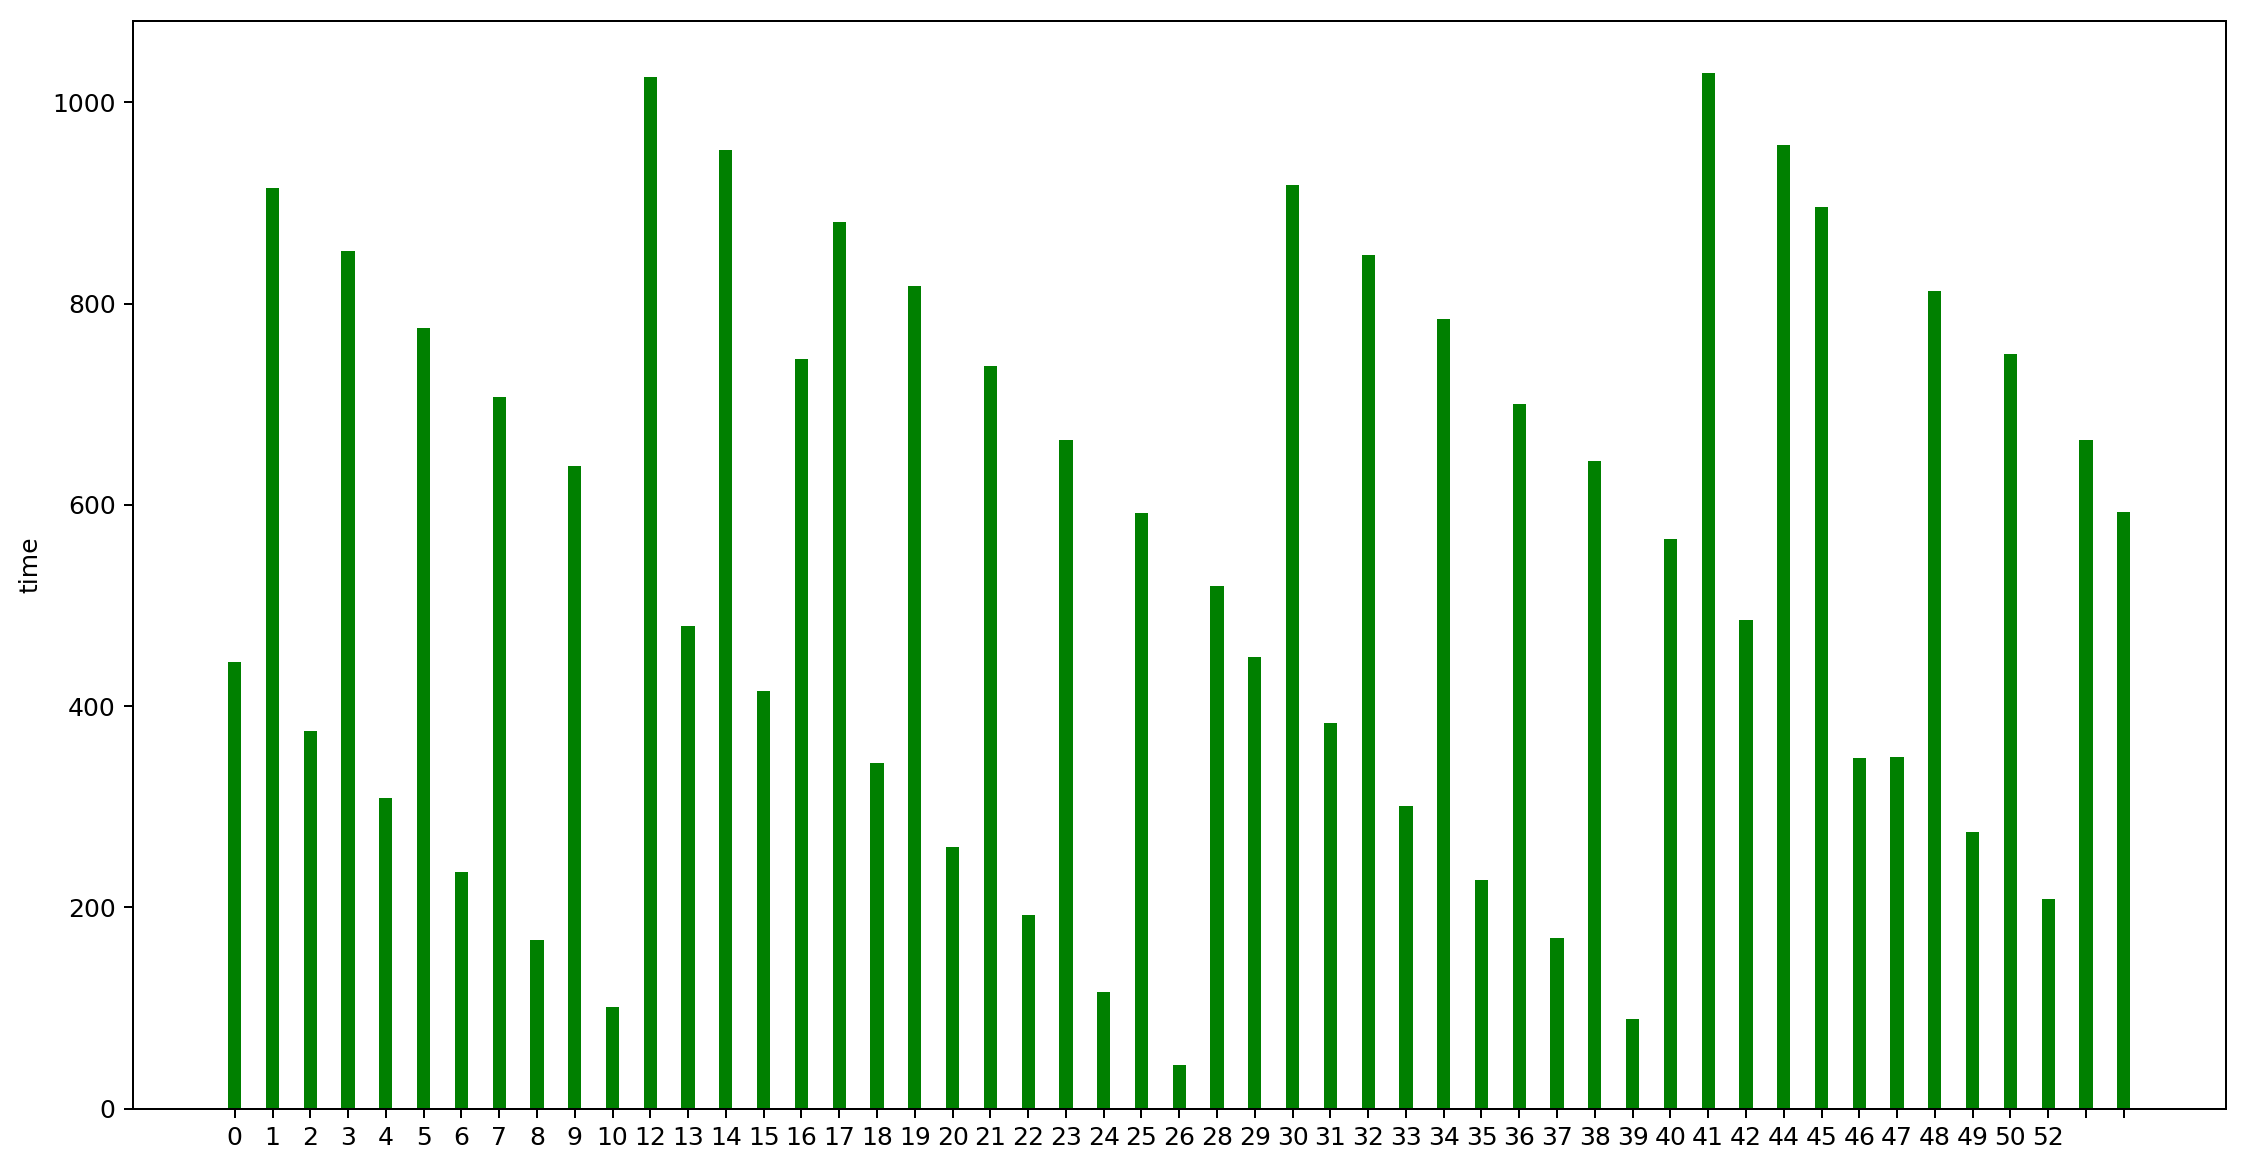

In [21]:
plt.figure(figsize=(15,8), dpi=180)

N = 51
print(pkt_to_enqueue)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence



#p1 = plt.bar(ind, pkt_to_up, width)
#p2 = plt.bar(ind, up_to_down, width, bottom=pkt_to_up)
p3 = plt.bar(ind, pkt_to_enqueue, width, color="g")

plt.ylabel('time')
plt.xticks(ind, pkt_num)
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

[3163, 3481, 935, 4107, 4421, 1879, 5056, 291, 916, 1234, 1553, 1870, 2183, 2491, 2812, 3127, 544, 3742, 4052, 1471, 4679, 5008, 239, 554, 875, 1184, 1813, 2136, 2447, 2751, 141, 3392, 3707, 1074, 4333, 4646, 2011, 199, 521, 834, 1151, 1793, 2105, 2417, 2716, 3031, 3345, 689, 4292, 1608]
平均延时: 621.7243243243244


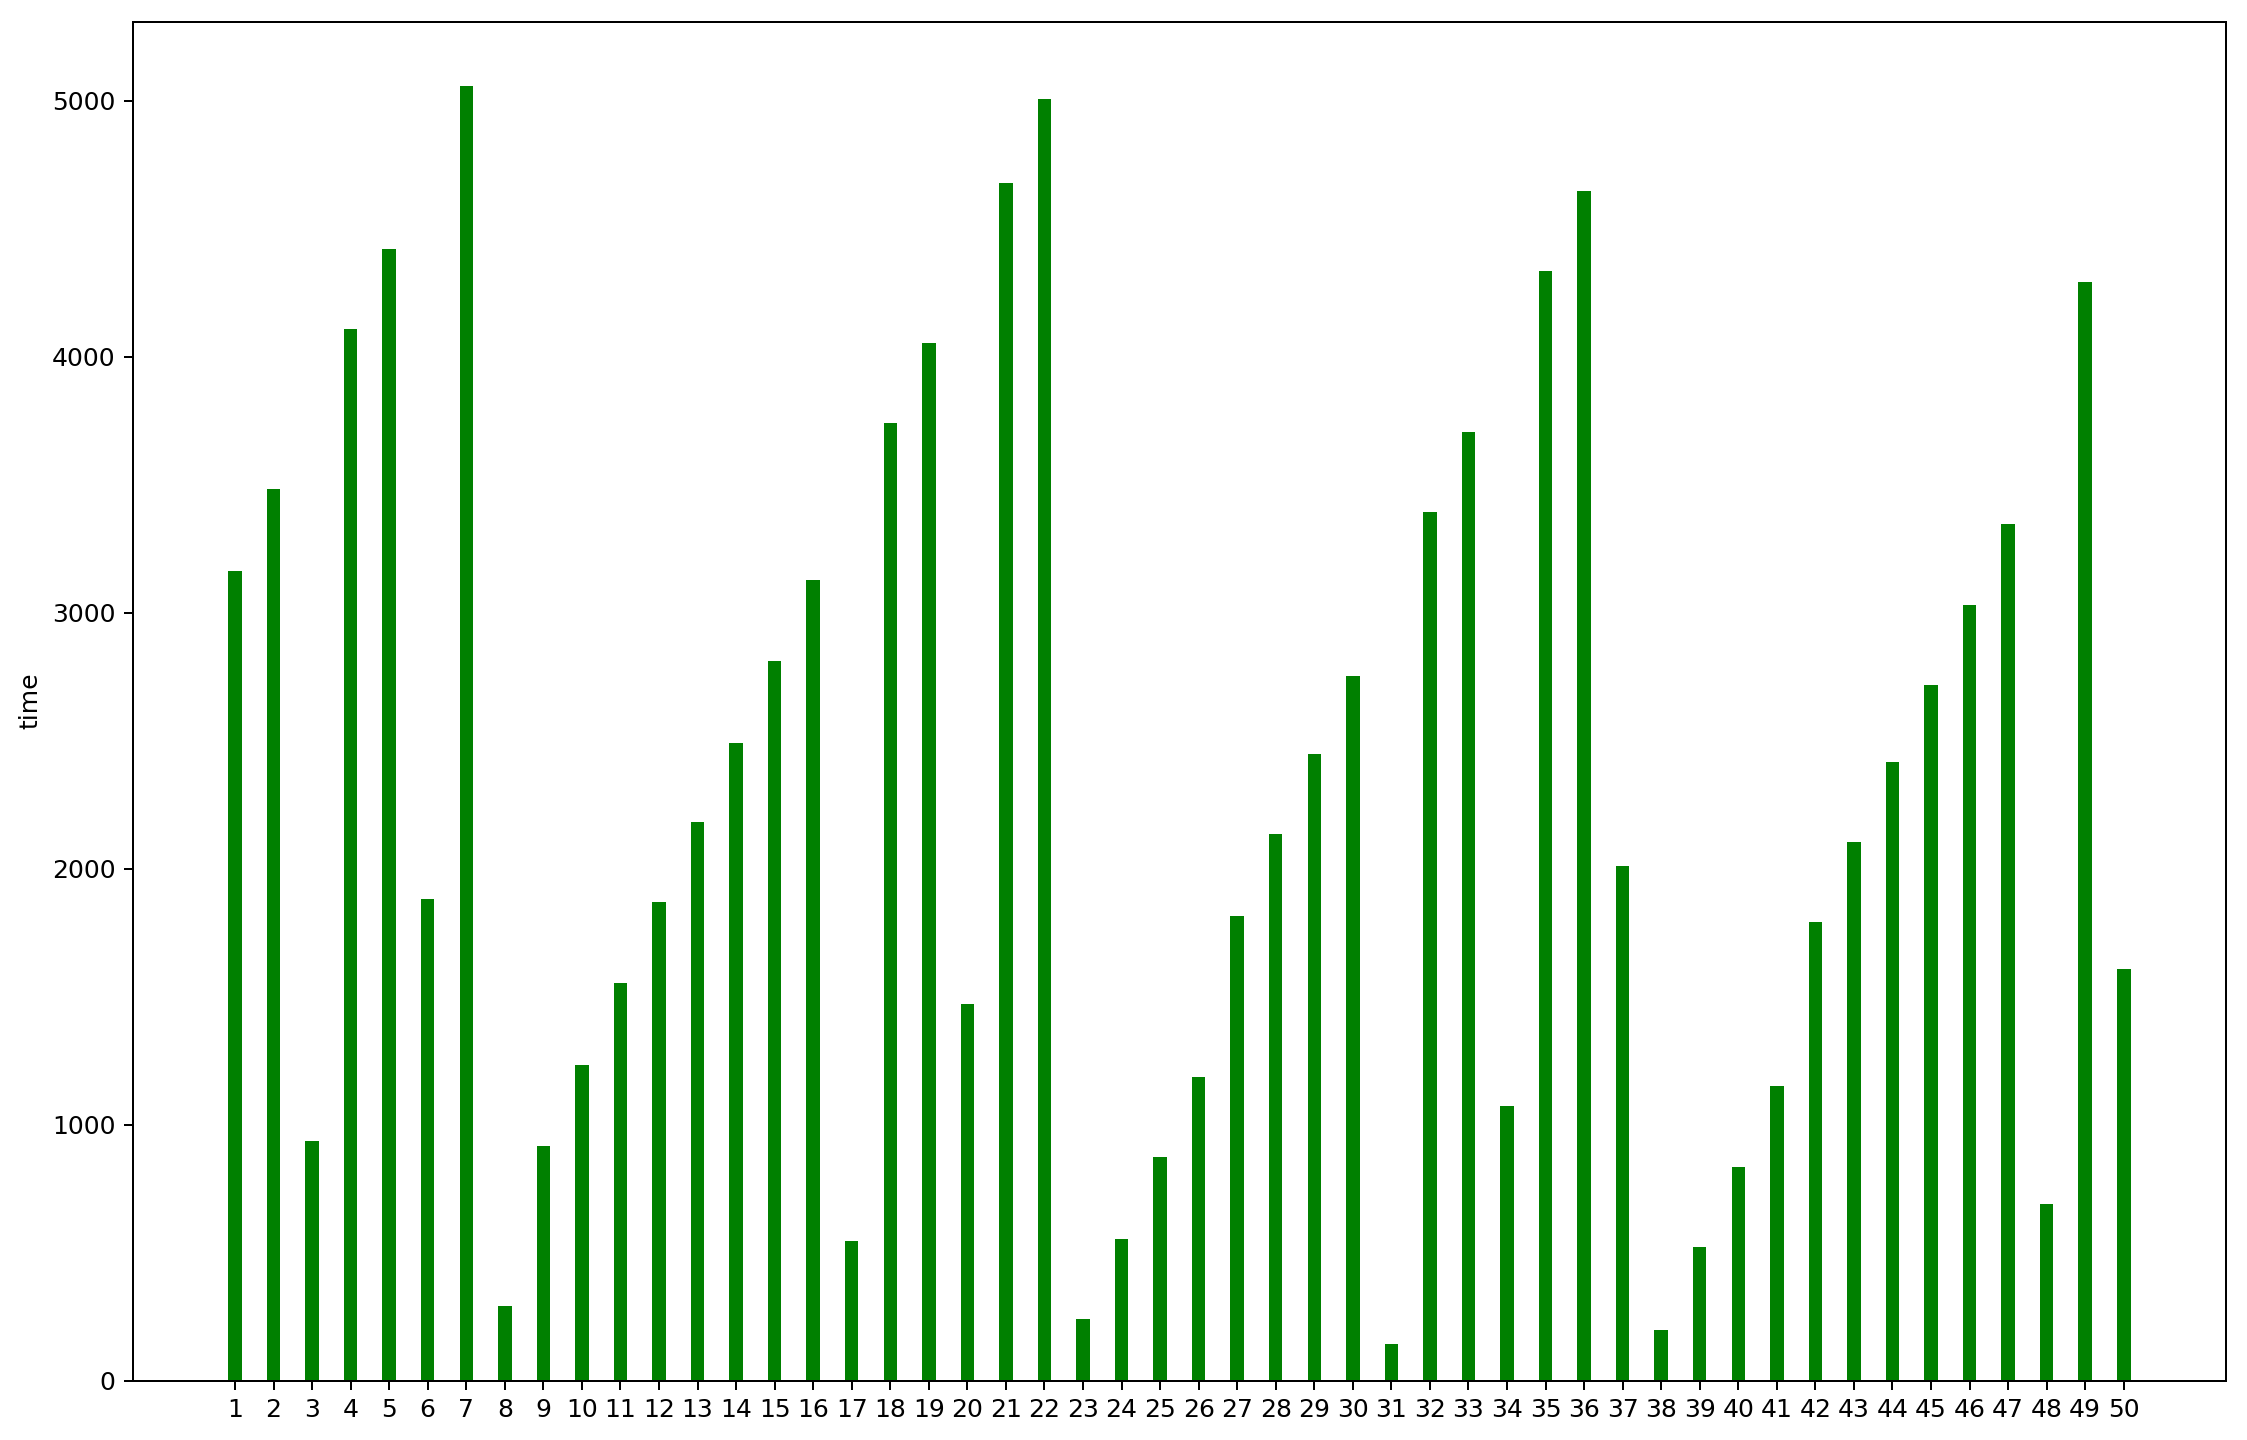

1418.4220230946783


In [16]:
import numpy as np
import matplotlib.pyplot as plt
gw1 = open("/Users/gexin/Desktop/1015_2.txt","r")
to_enqueue = []

for line in gw1:
    idx = line.find("PKTtoDOWN")
    if idx != -1:
        #print(line)
        #print(line[idx+11: -1])
        to_enqueue.append(int(line[idx+11: -1]))        
#print(len(to_enqueue))
print(to_enqueue)

print("平均延时: "+str(sum(to_enqueue)/185.0))
plt.figure(figsize=(15,10), dpi=180)

N = 50
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

#p1 = plt.bar(ind, pkt_to_up, width)
#p2 = plt.bar(ind, up_to_down, width, bottom=pkt_to_up)
p3 = plt.bar(ind, to_enqueue, width, color="g")
plt.ylabel('time')
plt.xticks(ind, range(1,51))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.show()


k6 = [];
avr = sum(to_enqueue)/50.0
for i in to_enqueue:
    k6.append((i-avr)**2)
p6 = math.sqrt(sum(k6)/50.0)
print(p6)